# カテゴリデータのクラスタリング

ここに多くの国のデータがありますが、これを同じ方法でクラスタリングしていきましょう
    
追加された特徴量として: 名前と大陸があります 

## ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# K近傍法を行うために必要なKMeansモジュールをインポートします
from sklearn.cluster import KMeans

## データの読み込み

In [7]:
# データを読み込みます
data = pd.read_csv('Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


重複した列を取り除きます

In [13]:
print(data['continent'].unique())

['North America' 'Asia' 'Africa' 'Europe' 'South America' 'Oceania'
 'Antarctica' 'Seven seas (open ocean)']


## Mapメソッドの適用

 <i>'continent'</i> をmapメソッドを使って置き換えていきます

In [15]:
# 元のデータのコピーの作成
#data_mapped = data.copy()
data_mapped = data.copy()
# 言語を0,1,2に置き換えていきます
#data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped['continent']=data_mapped['continent'].map({'North America':0,'Asia':1,'Africa':2,'Europe':3,'South America':4,'Oceania':5,'Antarctica':6,'Seven seas (open ocean)':7})

# 中身を確認します
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


## 特徴量の選択

In [29]:
# ilocメソッドを使って使う特徴量を取り出していきます
#x = data_mapped.iloc[:,1:4]
x = data_mapped.iloc[:,3:4]
x

,continent
0,0
1,1
2,2
3,0
4,3
...,...
236,5
237,1
238,2
239,2


## クラスタリング

まずは4つから始めます

In [30]:
# クラスからオブジェクトを作成します
#kmeans = KMeans(2)
kmeans = KMeans(4)

In [31]:
# モデルにデータをフィットさせます
#kmeans.fit(x)
kmeans.fit(x)

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

## クラスタリングの結果

In [32]:
# クラスタリングの結果を変数に格納していきます
#identified_clusters = kmeans.fit_predict(x)
identified_clusters = kmeans.fit_predict(x)
# 中身を確認します
#identified_clusters
identified_clusters

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 2, 0, 3, 3, 3, 0, 3, 0, 1, 1, 1, 1, 0, 1, 3, 0, 2, 3, 2, 2,
       0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 2, 2, 3, 3, 0, 2, 2,
       2, 2, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 3, 0, 2, 3, 2, 2,
       3, 3, 2, 3, 1, 3, 3, 3, 1, 2, 3, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0,
       1, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 0, 1, 3, 0, 0, 3, 0, 3, 0, 3, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 3, 0, 0, 0, 2, 2, 0, 3, 0, 2, 3, 3, 3,
       0, 0, 2, 3, 3, 2, 1, 0, 1, 3, 2, 3, 0, 3, 0, 1, 2, 2, 0, 1, 2, 0,
       2, 1, 2, 1, 2, 0, 1, 3, 3, 0, 1, 1, 0, 0, 0, 1, 3, 0, 1, 1, 3, 0,
       0, 3, 3, 0, 1, 0, 3, 3, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 3, 2,
       2, 0, 3, 2, 3, 3, 3, 3, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 2, 2, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2],
      dtype=int32)

In [33]:
# mapメソッドを使って変換したデータを変数に格納します
#data_with_clusters = data_mapped.copy()
data_with_clusters = data_mapped.copy()
# クラスタリングした結果を追加していきます
data_with_clusters['Cluster'] = identified_clusters
# 中身を確認します
#data_with_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,1,0
2,Angola,17.537368,-12.293361,2,2
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,3,3
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,1
237,Yemen,47.586762,15.909280,1,0
238,South Africa,25.083901,-29.000341,2,2
239,Zambia,27.774759,-13.458242,2,2


## データのプロット

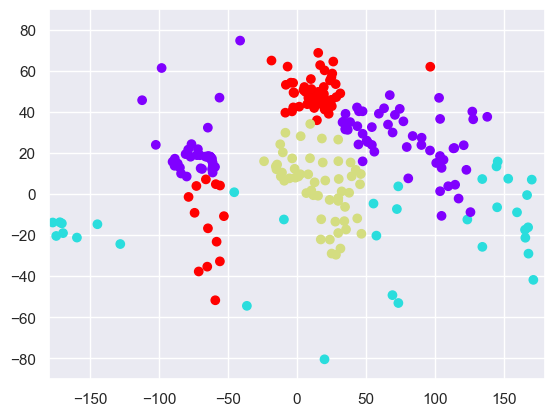

In [34]:
# 経度と緯度をそれぞれの軸にとってプロットしていきます
#plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
#plt.xlim(-180,180)
plt.xlim(-180,180)
#plt.ylim(-180,180)
plt.ylim(-90,90)
plt.show()